# # Project title- Predict the City Taxi Trip Duration ( By Suraj Ray )



# Business Goal


To improve the efficiency of electronic taxi dispatching systems
it is important to be able to predict how long a driver will have his taxi
occupied. 

If a dispatcher knew approximately when a taxi driver would be ending
their current ride, they would be better able to identify which driver to
assign to each pickup request.


ML Goal: To build a model that predicts the total ride duration of taxi trips
in New York City


Data: The taxi trip records include fields capturing pick
up and drop off
dates/times, pick up and drop off locations, trip distances, itemized fares,
rate types, payment types, and driver reported passenger counts. The data used
in the attached datasets were collected and provided to the NYC Taxi and
Limousine Commission (TLC) by technology providers authorized under the Taxicab.

# Challenge



A regression model was developed to predict the duration of the taxi trip. The model was trained on a large dataset of over 1.5 million taxi trips, which were randomly split into training and testing sets.

The features used in the regression model included distance, pickup and dropoff coordinates, pickup datetime, day of the week, and weather conditions such as temperature, precipitation, and wind speed.

The model was evaluated using various metrics such as Mean Squre Error (MSE) and Root Mean Squared Error (RMSE),R2 Score,Adjusted R2-Score and was compared to other machine learning algorithms such as Linear Regression,Decision Tree Random Forest, Gradient Boosting andXgboost. The regression model outperformed the other algorithms in terms of accuracy, with an R2 score of 67%.

Overall, the NYC Taxi Time Prediction project demonstrates the potential for regression models to accurately predict the duration of taxi trips in New York City, using a combination of various features such as location, time, and distance.

# #**GitHub Link -**https://github.com/Suraj-lgtm/Predict-Taxi-Trip-Duration

# Step 1 : Introduction

# **Problem Statement**-
To Build a machine learning model that predicts the duration of NYC taxi trip using the dataset which includes pickup time, geo-coordinates, the number of passengers, and several other variables

# 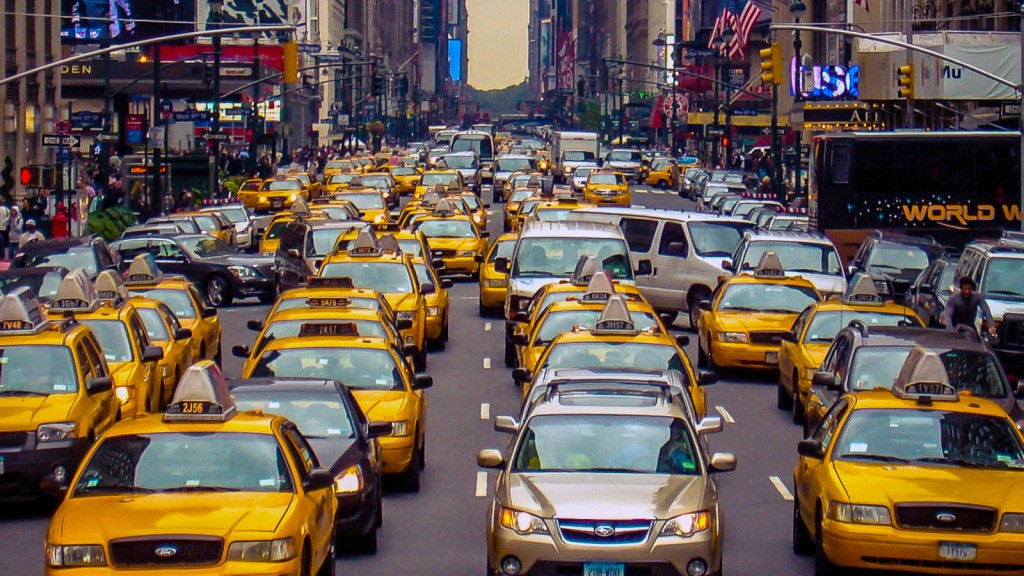

# About Data

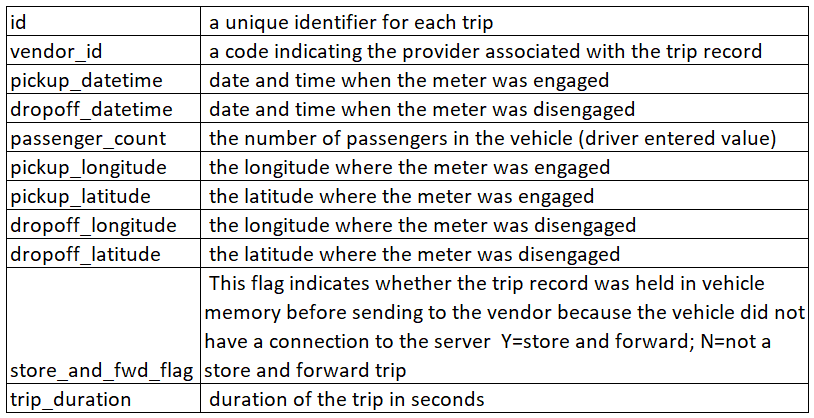


# Step 2 : Data Exploration

# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("NYC Taxi Data.csv",sep=",")

In [3]:
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


# Dataset Rows & Columns count

In [4]:
# finding no of rows and no of columns in data set
print('no of rows:',df.shape[0])
print('no of columns:',df.shape[1])

no of rows: 1458644
no of columns: 11


# Step 3 : Data preprocessing 

# Dataset Information

In [5]:
df.info

<bound method DataFrame.info of                 id  vendor_id      pickup_datetime     dropoff_datetime  \
0        id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1        id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2        id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3        id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4        id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   
...            ...        ...                  ...                  ...   
1458639  id2376096          2  2016-04-08 13:31:04  2016-04-08 13:44:02   
1458640  id1049543          1  2016-01-10 07:35:15  2016-01-10 07:46:10   
1458641  id2304944          2  2016-04-22 06:57:41  2016-04-22 07:10:25   
1458642  id2714485          1  2016-01-05 15:56:26  2016-01-05 16:02:39   
1458643  id1209952          1  2016-04-05 14:44:25  2016-04-05 14:47:43   

         passenger_count  pickup_longitude  pickup_latitude  \
0   

# Missing Values Analysis

By above operation we know that there is no missing value in our data set.Almost all data type is in their proper fotmat only pickup_date time and dropoff date time in string format which we have to change in their correct format.

# Duplicate Values

In [6]:
# make a function to check null values and unique values.
def information():
 x=pd.DataFrame(index=df.columns)
 x["data type"]=df.dtypes
 x["null values"]=df.isnull().sum()
 x["unique values"]=df.nunique()
 return x

In [7]:
information()

,data type,null values,unique values
id,object,0,1458644
vendor_id,int64,0,2
pickup_datetime,object,0,1380222
dropoff_datetime,object,0,1380377
passenger_count,int64,0,10
pickup_longitude,float64,0,23047
pickup_latitude,float64,0,45245
dropoff_longitude,float64,0,33821
dropoff_latitude,float64,0,62519
store_and_fwd_flag,object,0,2


By above we can see that there is no null value in our data set.

# Understanding Your Variables

In [8]:
# Dataset Columns
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

# **Column Details**
Id: A unique identifier for each trip

Vendor Id: A unique identifier for vendor

Pickup Datetime: Date and time of pickup

Dropoff Datetime: Date and time of dropoff

Passenger Count: The number of passengers in the vehicle (driver entered value)

Pickup Longitude: The longitude where the meter was engaged

Pickup Latitude: The latitude where the meter was engaged

Dropoff Longitude: The longitude where the meter was disengaged

Dropoff Latitude: The latitude where the meter was disengaged

Store and Fwd Flag: This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip.

Trip Duration: Duration of time in seconds

# Let us finally check for a statistical summary of our dataset.


# Note that this function can provide statistics for numerical features only.

In [10]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


# **Some insights from the above summary:**


* Vendor id has a minimum value of 1 and a maximum value of 2 which makes sense as we saw there are two vendor ids 1 and 2.

* Passenger count has a minimum of 0 which means either it is an error entered or the drivers deliberately entered 0 to complete a target number of rides.

# Data Cleaning or Data Wrangling

In [12]:
# converting into proper date format
df["pickup_datetime"]=pd.to_datetime(df["pickup_datetime"])
df["dropoff_datetime"]=pd.to_datetime(df["dropoff_datetime"])

In [13]:
df["dropoff_datetime"].dtypes

dtype('<M8[ns]')

In [14]:
# finding pickup and drop month
df["pickup_month"]=df["pickup_datetime"].dt.month
df["dropoff_month"]=df["dropoff_datetime"].dt.month

In [15]:
#finding pickup and drop 
df["pickup_date"]=df["pickup_datetime"].dt.day
df["dropoff_date"]=df["dropoff_datetime"].dt.day

In [16]:
# Creating pickup and dropoff weekdays
df['pickup_weekday'] =df['pickup_datetime'].dt.weekday
df['dropoff_weekday']=df['dropoff_datetime'].dt.weekday

In [17]:
# Creating pickup and dropoff hours
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['dropoff_hour'] =df['dropoff_datetime'].dt.hour

In [18]:
#creating pickup and dropoff day name
df['pickup_day']=df['pickup_datetime'].dt.day_name()
df['dropoff_day']=df['dropoff_datetime'].dt.day_name()

In [19]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_month,dropoff_month,pickup_date,dropoff_date,pickup_weekday,dropoff_weekday,pickup_hour,dropoff_hour,pickup_day,dropoff_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,3,3,14,14,0,0,17,17,Monday,Monday
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6,6,12,12,6,6,0,0,Sunday,Sunday
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,1,1,19,19,1,1,11,12,Tuesday,Tuesday
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,4,4,6,6,2,2,19,19,Wednesday,Wednesday
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,3,3,26,26,5,5,13,13,Saturday,Saturday


In [20]:
# calculate trip duration in minute
df["trip_duration_in_minute"]=df["trip_duration"]/60

In [21]:
# calculate the distance by given geospatial co ordinate in kilometer
from geopy.distance import great_circle
  
df['distance'] = df.apply(lambda row: great_circle((row['pickup_latitude'], row["pickup_longitude"]), (row['dropoff_latitude'], row['dropoff_longitude'])).kilometers, axis=1)


ModuleNotFoundError: No module named 'geopy'

In [22]:
# calculate the distance by given geospatial co ordinate in kilometer
from geopy.distance import great_circle
  
df['distance'] = df.apply(lambda row: great_circle((row['pickup_latitude'], row["pickup_longitude"]), (row['dropoff_latitude'], row['dropoff_longitude'])).kilometers, axis=1)


ModuleNotFoundError: No module named 'geopy'

# Step 4 : Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

# Chart-1

In [23]:
# percentage of trip by vendor
percentage_of_vend_1=round(len(df[df["vendor_id"]==1])/len(df)*100,1)
percentage_of_vend_2=round(len(df[df["vendor_id"]==2])/len(df)*100,1)
total_percentage=[percentage_of_vend_1,percentage_of_vend_2]
total_percentage

[46.5, 53.5]

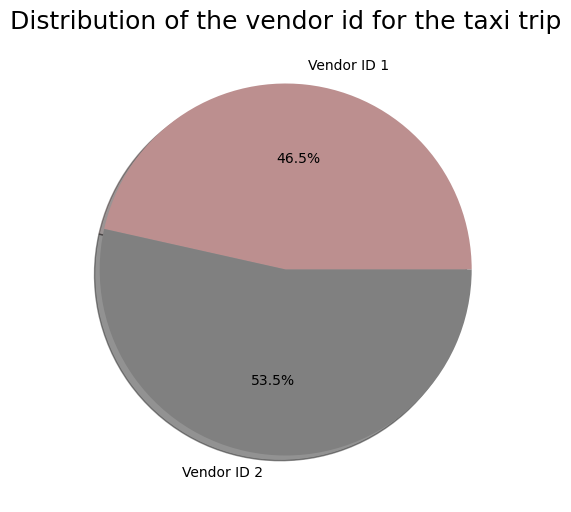

In [24]:
plt.figure(figsize = (6,8))
c=['rosybrown','gray']
plt.pie(total_percentage, labels = ['Vendor ID 1','Vendor ID 2'],autopct='%.1f%%',colors=c,shadow=True)
plt.title('Distribution of the vendor id for the taxi trip',fontsize=18)
plt.show()

#   We can observe that vendor 2 has a higher number of bookings (54%).


# Chart-2

In [25]:
df["store_and_fwd_flag"].value_counts()

N    1450599
Y       8045
Name: store_and_fwd_flag, dtype: int64

Text(0.5, 1.0, 'Store and Forward Flag')

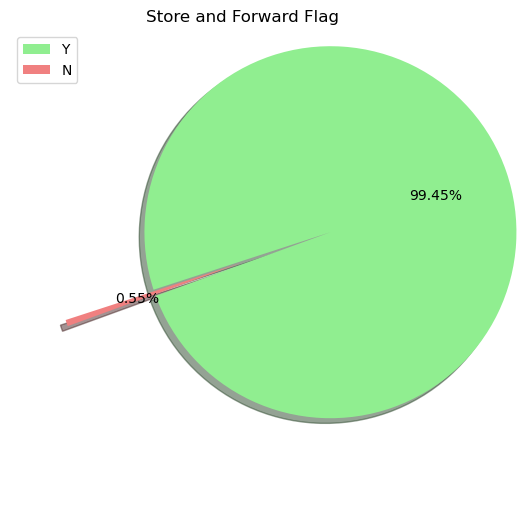

In [26]:
#Store & Forward flag

plt.figure(figsize=(6,8))
plt.pie(df['store_and_fwd_flag'].value_counts(), colors=['lightgreen', 'lightcoral'], shadow=True, explode=[0.5,0], autopct='%1.2f%%', startangle=200)
plt.legend(labels=['Y','N'])
plt.title("Store and Forward Flag")

#  We see there are less than 1% of trips that were stored before forwarding.

# Chart-3

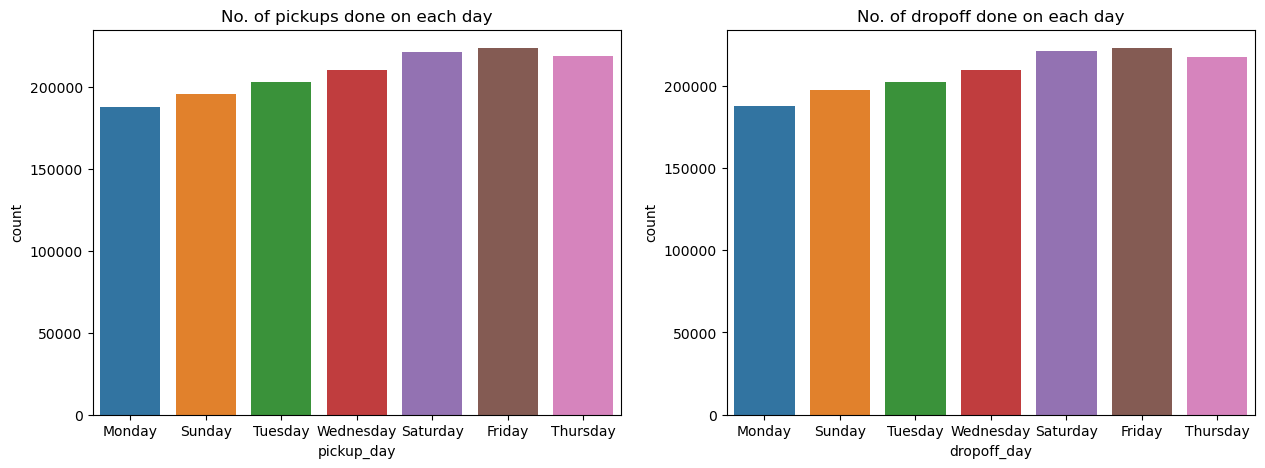

In [27]:
##Number of Pickups and Dropoff on each day of the week
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.countplot(x="pickup_day",data=df,ax=ax[0])
ax[0].set_title('No. of pickups done on each day')
sns.countplot(x="dropoff_day",data=df,ax=ax[1])
ax[1].set_title('No. of dropoff done on each day')
plt.show()

* Above plots interpret that in a week, "friday", and "saturday" have higher number of pickups and dropoffs.

* We can see that compared to other days, taxi booking rates are higher on the weekends ( Friday and Saturday).This suggests that individuals used to go out on weekends for their celebrations, parties, or even other personnel work.

# Chart-4

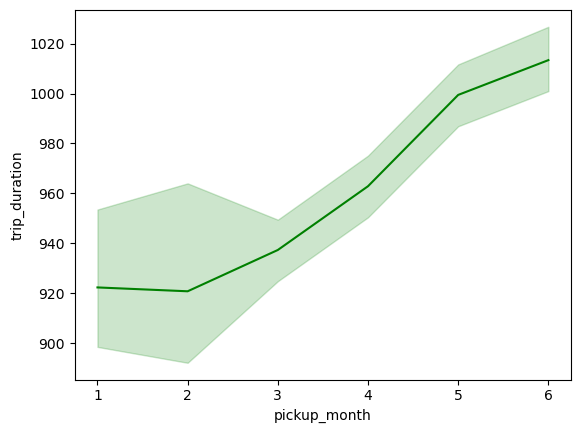

In [30]:
#Trip Duration by the month.
sns.lineplot(x='pickup_month',y='trip_duration',data=df,color='green')
plt.show()

# * From February, we can see trip duration rising every month. 

# Chart-5

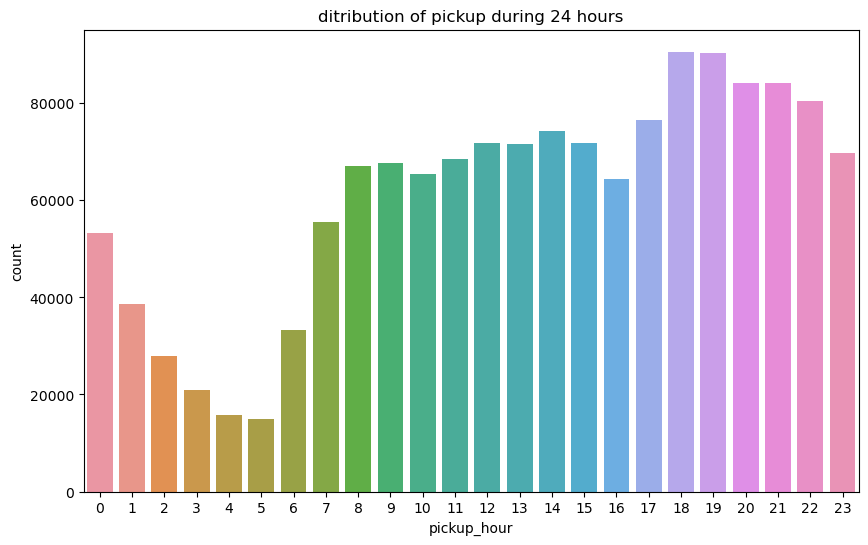

In [31]:
# distribution of ride in complete 24 hours hourly basis
plt.figure(figsize=(10,6))
sns.countplot(x=df["pickup_hour"])
plt.title("ditribution of pickup during 24 hours")
plt.show()

 * Distribution of pickup and dropoff hours follows same pattern, it shows that most of the pickups and dropoffs are in the evening. We can see that people often use taxi services to get to their workplaces in the mornings after 10:00 AM. and busiet time is 6PM to 7PM.

# Chart-6

In [32]:
#aggegate vendor id by pickup month
monthly_pickup_by_vendor=df.groupby(["pickup_month","vendor_id"]).size()
monthly_pickup_by_vendor = monthly_pickup_by_vendor.unstack()

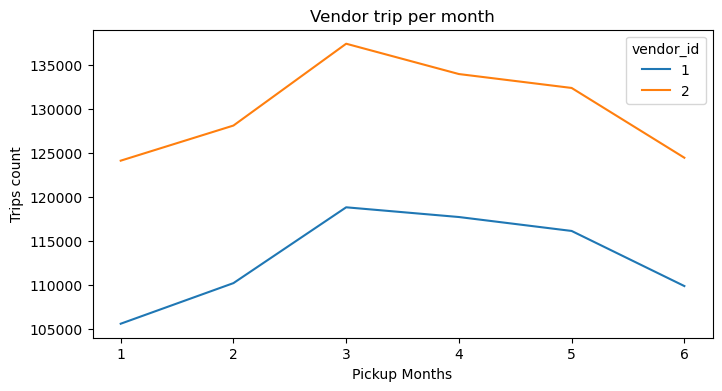

In [33]:
monthly_pickup_by_vendor.plot(kind = 'line', figsize = (8,4))
plt.title('Vendor trip per month')
plt.xlabel('Pickup Months')
plt.ylabel('Trips count')
plt.show()

* We can see that both vendors' trips are at their maximum in the month of March and their lowest in the month of January, February, and after June.

# Chart-7

In [34]:
#Passenger Count
df.passenger_count.value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

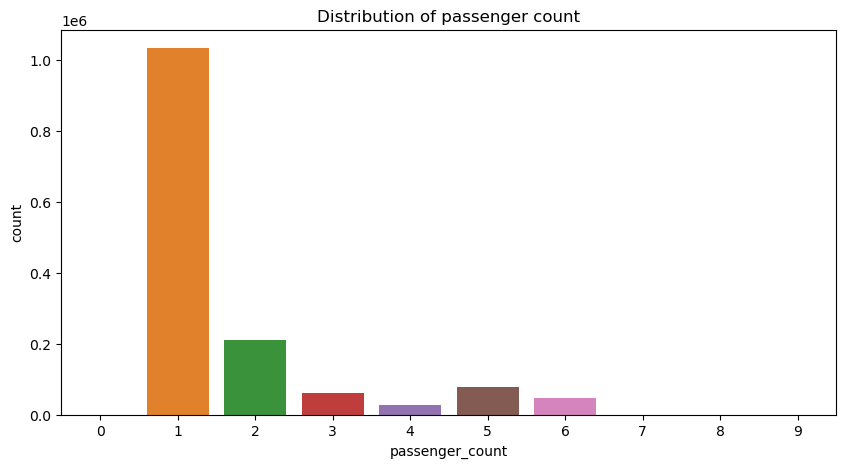

In [35]:
# distribution of passenger 
plt.figure(figsize=(10,5))
sns.countplot(x=df["passenger_count"])
plt.title('Distribution of passenger count')
plt.show()

* We can notice that most of the bookings are made by solo traveler.which means less number of people prefer car pool or may be less number of groups book car...people prefer to ride solo

# Chart-8

In [36]:
# divide trip duration in differnt bins 
labels=['less then 1min','within 10 mins','within 30 mins','within hour','within day','within two days','more then two day']

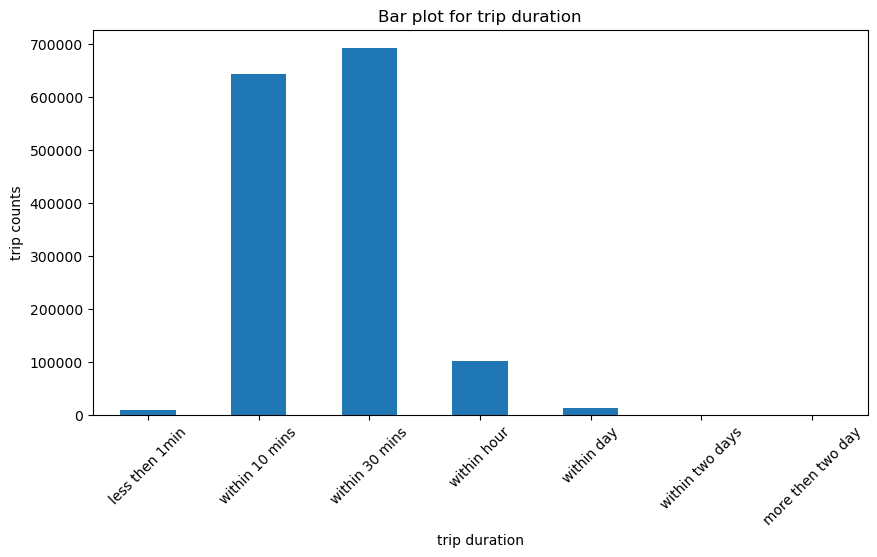

In [37]:
plt.figure(figsize=[10,5])
df1=pd.cut(df['trip_duration_in_minute'],bins=[0,1,10,30,60,1440,1440*2,50000],labels=labels)
df.groupby(df1)['trip_duration_in_minute'].count().plot(kind='bar')
plt.title("Bar plot for trip duration")
plt.ylabel("trip counts")
plt.xlabel("trip duration")
plt.xticks(rotation=45)
plt.show()

* By above chart we can see that most of trip duration 10 to 30 minute. some trip also goes on hourly.long trip with in day very rare.